In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vcdvcd import VCDVCD
from vcd2csv import ToDataFrameCallbacks

### How to dump signals at Vivado Simulator
[ Vivado Tcl Console ]
* open_vcd xsim_dump.vcd
* log_vcd /tb_system_body/inst_system_body/i_process_top/clk
* log_vcd /tb_system_body/inst_system_body/i_process_top/fft_data_r
* log_vcd /tb_system_body/inst_system_body/i_process_top/fft_idx_r
* log_vcd /tb_system_body/inst_system_body/i_process_top/fft_valid_r
* run 100us
* close xsim_dump.vcd \
file saved at project_adc.sim\sim_1\behav\xsim

## VCD to dataframe

In [36]:
vcd_path = 'xsim_dump.vcd'
callbacks = ToDataFrameCallbacks()
vcd = VCDVCD(vcd_path, signals=[], store_tvs=False, callbacks=callbacks)
vcd = VCDVCD(vcd_path)
df = callbacks.dataframe()
df[:10]

,time,tb_system_body.inst_system_body.i_process_top.clk,tb_system_body.inst_system_body.i_process_top.fft_data_r[31:0],tb_system_body.inst_system_body.i_process_top.fft_idx_r[11:0],tb_system_body.inst_system_body.i_process_top.fft_valid_r
0,0,0,0,x,x
1,100,0,0,0,0
2,500,1,0,0,0
3,1000,0,0,0,0
4,1500,1,0,0,0
5,2000,0,0,0,0
6,2500,1,0,0,0
7,3000,0,0,0,0
8,3500,1,0,0,0
9,4000,0,0,0,0


### Reduce column name

In [37]:
'''
	time	clk	fft_data_r	fft_idx_r	fft_valid_r
0	0	0	0	x	x
1	100	0	0	0	0
2	500	1	0	0	0
3	1000	0	0	0	0
4	1500	1	0	0	0
    
'''
col_names=[]
for name in df.columns:
    name = name.split('.')[-1]
    name = name.split('[')[0]
    col_names.append(name)
df.columns = col_names
# conver to integer
df.time = df.time.astype(int)
df[:10]

,time,clk,fft_data_r,fft_idx_r,fft_valid_r
0,0,0,0,x,x
1,100,0,0,0,0
2,500,1,0,0,0
3,1000,0,0,0,0
4,1500,1,0,0,0
5,2000,0,0,0,0
6,2500,1,0,0,0
7,3000,0,0,0,0
8,3500,1,0,0,0
9,4000,0,0,0,0


### Latch data at clock rising edge

In [38]:
dfa = df[df.time % 1000 == 500]
dfa[:10]

,time,clk,fft_data_r,fft_idx_r,fft_valid_r
2,500,1,0,0,0
4,1500,1,0,0,0
6,2500,1,0,0,0
8,3500,1,0,0,0
10,4500,1,0,0,0
12,5500,1,0,0,0
14,6500,1,0,0,0
16,7500,1,0,0,0
18,8500,1,0,0,0
20,9500,1,0,0,0


### Extract fft_data_r when fft_valid_r is '1'

In [39]:
dfb = dfa['fft_data_r'].loc[dfa.fft_valid_r == '1']
mag = dfb.apply(int, base=16)

### Plot

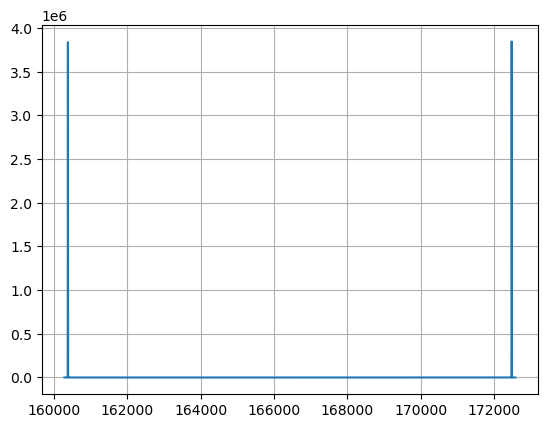

In [40]:
plt.plot(mag)
plt.grid()

### Save to csv

In [41]:
mag.to_csv('fft_mag.csv', index=False)